In [1]:
%matplotlib inline
import matplotlib
from matplotlib import pyplot as plt
from cmocean import cm as cmo
plt.style.use('seaborn-poster')
plt.style.use('ggplot')

import numpy as np
import pandas as pd
import xarray as xr
import scipy
import glob
import matplotlib.dates as mdates
import datetime
import dask.array as da

import cartopy.crs as ccrs
import cartopy
import matplotlib.gridspec as gridspec
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

In [2]:
from glob import glob

In [3]:
trkfiles = glob("../data/track_data/csvs/*")
trkfiles

['../data/track_data/csvs/Fay_2020.csv',
 '../data/track_data/csvs/Irene_2011.csv',
 '../data/track_data/csvs/Jose_2017.csv',
 '../data/track_data/csvs/Isaias_2020.csv',
 '../data/track_data/csvs/Earl_2010.csv',
 '../data/track_data/csvs/Hermine_2016.csv',
 '../data/track_data/csvs/ARTHUR_2014.csv',
 '../data/track_data/csvs/Barry_2007.csv',
 '../data/track_data/csvs/Teddy_2020.csv',
 '../data/track_data/csvs/Sandy_2012.csv',
 '../data/track_data/csvs/Maria_2017.csv']

In [4]:
trkfiles_names = ["Fay 2020", "Irene 2011", 
                  "Jose 2017", "Isaias 2020", 
                  "Earl 2010", "Hermine 2016", 
                  "Arthur 2014", "Barry 2007", 
                  "Teddy 2020", "Sandy 2012", 
                  "Maria 2017"]

In [5]:
trk_orders = [8,2,6,9,1,5,4,0,10,3,7]
trk_inshor = [1,1,0,1,0,0,1,1, 0,2,0]

a = np.argsort(np.asarray(trk_orders))
print(a)
#trkfiles_good       = [trkfiles[x] for x in trk_orders]
#trkfiles_names_good = [trkfiles_names[x] for x in trk_orders]
#trk_inshor_good     = [trk_inshor[x] for x in trk_orders]

[ 7  4  1  9  6  5  2 10  0  3  8]


In [6]:
print([trk_orders[j] for j in a])

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]


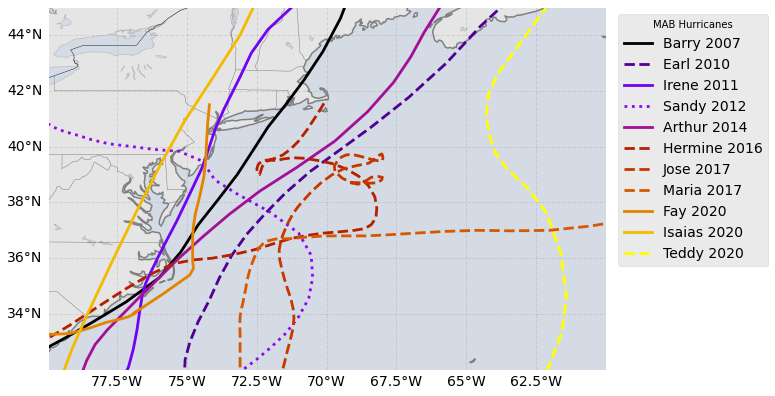

In [10]:
fig = plt.figure(figsize=(10,10))
ax  = plt.subplot(projection=ccrs.PlateCarree())
ax.coastlines(resolution='50m', color='gray', linewidth=1.5)


n = len(trkfiles)
colors = plt.cm.gnuplot(np.linspace(0,1,n))

for jj in a:
    #print(trkfiles_names[jj])
    j = trk_orders[jj]
    df = pd.read_csv(trkfiles[jj], skiprows=[1])
    if trk_inshor[jj] == 0:
        ax.plot(df['LON'].values, df['LAT'].values, label=trkfiles_names[jj], linestyle="--", c=colors[j])
    if trk_inshor[jj] == 1:
        ax.plot(df['LON'].values, df['LAT'].values, label=trkfiles_names[jj], c=colors[j])
    if trk_inshor[jj] == 2:
        ax.plot(df['LON'].values, df['LAT'].values, label=trkfiles_names[jj], linestyle=":", c=colors[j])
    
ax.add_feature(cartopy.feature.NaturalEarthFeature('cultural', 'admin_1_states_provinces_lines',
                     '50m', edgecolor='gray', facecolor='none'))
ax.add_feature(cartopy.feature.BORDERS, edgecolor='k', facecolor='none')
ax.add_feature(cartopy.feature.OCEAN, alpha=0.2)
ax.add_feature(cartopy.feature.LAKES, alpha=0.2, edgecolor='k')
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=1, color='gray', alpha=0.2, linestyle='--')


gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.top_labels = False
gl.right_labels = False
gl.xlabel_style = {'size': 14}
gl.ylabel_style = {'size': 14}
plt.ylim([32,45])
plt.xlim([-80, -60])
plt.legend(title='MAB Hurricanes', bbox_to_anchor=(1.01, 1), loc='upper left', prop={'size': 14})
plt.savefig("FIGS/map_MABhurricanes.pdf", bbox_inches='tight')